In [51]:
import pandas as pd
import textblob
import tweepy
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys
import pandas

In [2]:
# pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [43]:
consumer_key="xOUE72oPnhrebwDHqnpBr4vUG"
consumer_secret="Kb9mTv8nEoed0oQgHWW8tAnjjT9D7Z1I8c1SCZMAmyoadWPFo0"
access_token="2316393302-Sh7TMOnADLNo8he0w0q2vVt9lN5w85910j8Z8Ij"
access_token_secret="jqZEKRke9B9QzkmURsjOIb0ANmegnbwt6WtfF9CXxuHMg"

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
auth_api = API(auth)

In [44]:
userID = "realDonaldTrump"

In [45]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

In [46]:
for info in tweets[:3]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print("\n")

ID: 1308033225932058625
2020-09-21 13:19:57
@SenateGOP Crazy Nancy Pelosi wants to Impeach me if I fulfill my Constitutional Obligation to put forth a Nominee for the vacated seat on the United States Supreme Court. This would be a FIRST, even crazier than being Impeached for making a PERFECT phone call to Ukrainian Pres.


ID: 1308008758031904768
2020-09-21 11:42:44
“The Trump Century, How Our President Changed the Course of History Forever”. On sale tomorrow. A great book by an even greater author. Make Lou NUMBER ONE! Much better than the boring, no new info., Woodward book. Besides, Lou is much smarter and sharper than Bob, by a lot!


ID: 1308005225102561280
2020-09-21 11:28:41
Will be interviewed on @foxandfriends at 8:00 A.M. Enjoy!  @FoxNews




In [47]:
all_tweets=[]
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('Number of tweets downloaded till now {}'.format(len(all_tweets)))

Number of tweets downloaded till now 249
Number of tweets downloaded till now 355
Number of tweets downloaded till now 424
Number of tweets downloaded till now 528
Number of tweets downloaded till now 632
Number of tweets downloaded till now 786
Number of tweets downloaded till now 854
Number of tweets downloaded till now 963
Number of tweets downloaded till now 1044
Number of tweets downloaded till now 1130
Number of tweets downloaded till now 1180
Number of tweets downloaded till now 1239
Number of tweets downloaded till now 1340
Number of tweets downloaded till now 1426
Number of tweets downloaded till now 1552
Number of tweets downloaded till now 1625


In [50]:
from pandas import DataFrame
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(all_tweets)]
df = DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text"])
df.to_csv('%s_tweets.csv' % userID,index=False)
df.head(20)

,id,created_at,favorite_count,retweet_count,text
0,1308033225932058625,2020-09-21 13:19:57,19382,7730,@SenateGOP Crazy Nancy Pelosi wants to Impeach...
1,1308008758031904768,2020-09-21 11:42:44,62624,14709,"“The Trump Century, How Our President Changed ..."
2,1308005225102561280,2020-09-21 11:28:41,54552,8623,Will be interviewed on @foxandfriends at 8:00 ...
3,1307819728249946112,2020-09-20 23:11:35,82174,14793,Will be interviewed by @marklevinshow on @FoxN...
4,1307733226056830977,2020-09-20 17:27:52,52958,14518,https://t.co/WwzdPhDkAZ
5,1307693536322752513,2020-09-20 14:50:09,292492,57106,"SAVE YOUR SECOND AMENDMENT, VOTE TRUMP!"
6,1307683647147966465,2020-09-20 14:10:51,82294,21087,People want respect for our Anthem and our Fla...
7,1307676330889220096,2020-09-20 13:41:47,51420,13204,Vote! https://t.co/pLVMieeGAn
8,1307676200916209664,2020-09-20 13:41:16,50016,11992,Vote! https://t.co/naCPEzQRMt
9,1307675370322145282,2020-09-20 13:37:58,340783,57427,MAKE AMERICA GREAT AGAIN!


In [53]:
# Lets make some preliminary analysis

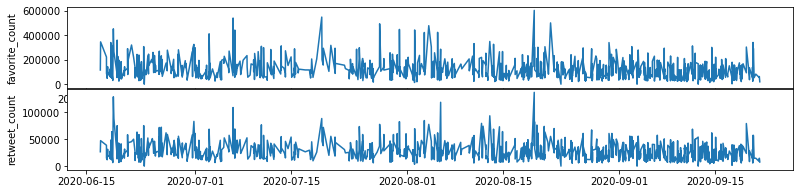

In [54]:
import matplotlib.pyplot as plt

ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(13,3))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df["created_at"],df[ylabel])
    ax.set_ylabel(ylabel)
plt.show()

In [ ]:
# Lets make sentiment analysis on the tweets

In [55]:
from textblob import TextBlob
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment[0])
df[['text','polarity']].head(5)

# Displaying top 5 positive posts of Category_A
df[df.polarity>0].head(5)

,id,created_at,favorite_count,retweet_count,text,polarity
0,1308033225932058625,2020-09-21 13:19:57,19382,7730,@SenateGOP Crazy Nancy Pelosi wants to Impeach...,0.21250
1,1308008758031904768,2020-09-21 11:42:44,62624,14709,"“The Trump Century, How Our President Changed ...",0.18447
2,1308005225102561280,2020-09-21 11:28:41,54552,8623,Will be interviewed on @foxandfriends at 8:00 ...,0.50000
3,1307819728249946112,2020-09-20 23:11:35,82174,14793,Will be interviewed by @marklevinshow on @FoxN...,0.50000
9,1307675370322145282,2020-09-20 13:37:58,340783,57427,MAKE AMERICA GREAT AGAIN!,1.00000


In [59]:
df_sub = df.loc[(df["favorite_count"] > 30000) & (df["retweet_count"] > 20000),:]
for irow in range(df_sub.shape[0]):
    df_row = df_sub.iloc[irow,:]
    
    print(df_row["created_at"])
    print("favorite_count={:6} retweet_count={:6}".format(df_row["favorite_count"],df_row["retweet_count"]))
    print(df_row["text"])
    print("\n")

2020-09-20 14:50:09
favorite_count=292492 retweet_count= 57106
SAVE YOUR SECOND AMENDMENT, VOTE TRUMP!


2020-09-20 14:10:51
favorite_count= 82294 retweet_count= 21087
People want respect for our Anthem and our Flag. Ratings will only get worse! Didn’t we go through this once before? https://t.co/3FBZLQGY8R


2020-09-20 13:37:58
favorite_count=340783 retweet_count= 57427
MAKE AMERICA GREAT AGAIN!


2020-09-20 13:37:14
favorite_count=205045 retweet_count= 37669
LAW &amp; ORDER!


2020-09-20 11:48:23
favorite_count=138248 retweet_count= 30974
VIRGINIA, and everywhere else for that matter, I am the only thing standing between you and your 2nd Amendment. If I am re-elected, it is 100% SAFE. If not, it is GONE!


2020-09-20 01:08:38
favorite_count=133356 retweet_count= 28555
THANK YOU NORTH CAROLINA!
https://t.co/WwzdPhDkAZ https://t.co/RPGV0fuMwz


2020-09-19 14:10:27
favorite_count=303313 retweet_count= 79383
.@GOP  We were put in this position of power and importance to make decisions fo

2020-09-12 20:10:58
favorite_count= 82654 retweet_count= 24105
The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it. Almost all recent elections using this system, even though much smaller &amp;  with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp; Fraud!


2020-09-12 13:09:37
favorite_count=140781 retweet_count= 40730
Was Andy McCabe ever forced to pay back the $700,000 illegally given to him and his wife, for his wife’s political campaign, by Crooked Hillary Clinton while Hillary was under FBI investigation, and McCabe was the head of the FBI??? Just askin’?


2020-09-12 13:03:12
favorite_count= 99342 retweet_count= 26900
....It has now been determined that the Mueller Scam should never have been set up in the first place, there were no grounds. It was all an illegitimate Witch Hunt, &amp; a big price must be paid. How different my life would have been if this fraud on America was never 

Trump Orders Purge of ‘Critical Race Theory‘ from Federal Agencies https://t.co/ygXcTXRHsQ via @BreitbartNews  This is a sickness that cannot be allowed to continue. Please report any sightings so we can quickly extinguish!


2020-09-05 04:22:16
favorite_count=254923 retweet_count= 43825
Nice flag! https://t.co/Mab6n7TBzg


2020-09-05 03:59:53
favorite_count=109794 retweet_count= 24153
Thank you Mark! https://t.co/pLpJBFnyNz


2020-09-05 03:19:24
favorite_count= 61007 retweet_count= 21767
Jennifer Griffin of Fox News Did Not Confirm ‘Most Salacious‘ Part of Atlantic Story https://t.co/rUpbSWhHac via @BreitbartNews  All refuted by many witnesses. Jennifer Griffin should be fired for this kind of reporting. Never even called us for comment. @FoxNews is gone!


2020-09-05 02:58:25
favorite_count= 71192 retweet_count= 21419
Exclusive: Nearly 700 U.S. Veterans Issue Open Letter in Support of Trump https://t.co/IoKXU2a9EU via @BreitbartNews Thank you! As we get closer and closer to the Novem

2020-08-10 23:20:41
favorite_count=124489 retweet_count= 28083
https://t.co/0Qex1aSLCf


2020-08-10 18:13:19
favorite_count=331415 retweet_count= 57068
Play College Football!


2020-08-10 17:20:44
favorite_count=138361 retweet_count= 34015
The student-athletes have been working too hard for their season to be cancelled. #WeWantToPlay https://t.co/lI3CCKZ4ID


2020-08-10 17:15:55
favorite_count=117020 retweet_count= 25457
We have narrowed the Presidential Nomination Acceptance Speech, to be delivered on the final night of the Convention (Thursday), to two locations - The Great Battlefield of Gettysburg, Pennsylvania, and the White House, Washington, D.C. We will announce the decision soon!


2020-08-10 14:55:55
favorite_count=114134 retweet_count= 29332
Portland, which is out of control, should finally, after almost 3 months, bring in the National Guard. The Mayor and Governor are putting people’s lives at risk. They will be held responsible. The Guard is ready to act immediately. The C

2020-07-06 20:17:46
favorite_count=147344 retweet_count= 38740
Why does the Lamestream Fake News Media REFUSE to say that China Virus deaths are down 39%, and that we now have the lowest Fatality (Mortality) Rate in the World. They just can’t stand that we are doing so well for our Country!


2020-07-06 20:11:42
favorite_count=182831 retweet_count= 42380
Corrupt Joe Biden and the Democrats don’t want to open schools in the Fall for political reasons, not for health reasons! They think it will help them in November. Wrong, the people get it!


2020-07-06 18:44:09
favorite_count=101086 retweet_count= 23083
The Democrats would not have BANNED travel from heavily infected China, especially so early, therefore, far more people would have died. Corrupt Joe Biden now admits this!!!


2020-07-06 18:40:10
favorite_count=441808 retweet_count= 69255
SCHOOLS MUST OPEN IN THE FALL!!!


2020-07-06 18:36:59
favorite_count=115237 retweet_count= 32573
“Treatment with hydroxychloroquine cut the death ra